In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('bmh')

In [2]:
import numpy as np

import torch
import random
import math
import json

from tqdm import tqdm_notebook
from boltons.iterutils import pairwise
from scipy.stats import kendalltau
from itertools import permutations

from sent_order.models.kt_regression import SentenceEncoder, Regressor, Corpus
from sent_order.perms import sample_uniform_perms

In [3]:
sent_encoder = torch.load(
    '../../data/models/new/kt-reg/sent_encoder.366.bin',
    map_location={'cuda:0': 'cpu'},
)

In [4]:
regressor = torch.load(
    '../../data/models/new/kt-reg/regressor.366.bin',
    map_location={'cuda:0': 'cpu'},
)

/Users/dclure/Projects/plot-ordering/env/lib/python3.6/site-packages/torch/serialization.py:286: SourceChangeWarning: source code of class 'sent_order.models.kt_regression.Regressor' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [5]:
train = Corpus('../../data/dev.json/', 10000)

100%|██████████| 10000/10000 [00:01<00:00, 6938.94it/s]


In [20]:
grafs = [g for g in train.grafs if len(g.sentences) == 7]

In [21]:
len(grafs)

948

In [85]:
graf = random.choice(grafs)

In [86]:
[' '.join(s.tokens) for s in graf.sentences]

['In this paper , the bit energy requirements of training - based transmission over block Rayleigh fading channels are studied .',
 'Pilot signals are employed to obtain the minimum mean - square - error ( MMSE ) estimate of the channel fading coefficients .',
 'Energy efficiency is analyzed in the worst case scenario where the channel estimate is assumed to be perfect and the error in the estimate is considered as another source of additive Gaussian noise .',
 'It is shown that bit energy requirement grows without bound as the snr goes to zero , and the minimum bit energy is achieved at a nonzero snr value below which one should not operate .',
 'The effect of the block length on both the minimum bit energy and the snr value at which the minimum is achieved is investigated .',
 'Flash training schemes are analyzed and shown to improve the energy efficiency in the low - snr regime .',
 'Energy efficiency analysis is also carried out when peak power constraints are imposed on pilot sign

In [87]:
sents = sent_encoder(graf.sentence_variables())

In [88]:
sents

Variable containing:
-1.8294e-03  1.2207e-02  1.4377e-03  ...  -1.2320e-04 -1.8878e-05 -5.7649e-03
 2.8174e-02 -9.3968e-05 -6.6670e-03  ...  -9.2516e-02  1.2490e-03  5.1973e-04
-9.6534e-03 -1.2943e-02 -2.6959e-04  ...  -8.6813e-04  3.4271e-05  7.9396e-03
                ...                   ⋱                   ...                
 9.3385e-05  6.8151e-03 -3.1055e-03  ...   3.2289e-04 -1.9716e-07 -5.4731e-03
-4.3408e-02 -1.4856e-02 -2.0338e-02  ...  -3.5193e-04  4.3180e-04  2.1744e-02
-1.1511e-02  2.9602e-04 -1.5982e-01  ...  -1.2502e-04  4.1597e-06  4.1023e-02
[torch.FloatTensor of size 7x1000]

In [89]:
perms = random.sample(list(permutations(range(7))), 100)

In [90]:
x = []
kts = []
for perm in tqdm_notebook(perms):
    
    sort = torch.LongTensor(perm)
    x.append(sents[sort])
    
    kt = kendalltau(perm, range(7)).correlation
    kts.append(kt)

HBox(children=(IntProgress(value=0), HTML(value='')))

In [91]:
x = torch.stack(x)
y = regressor(x)

In [92]:
y = (1-y)*2-1

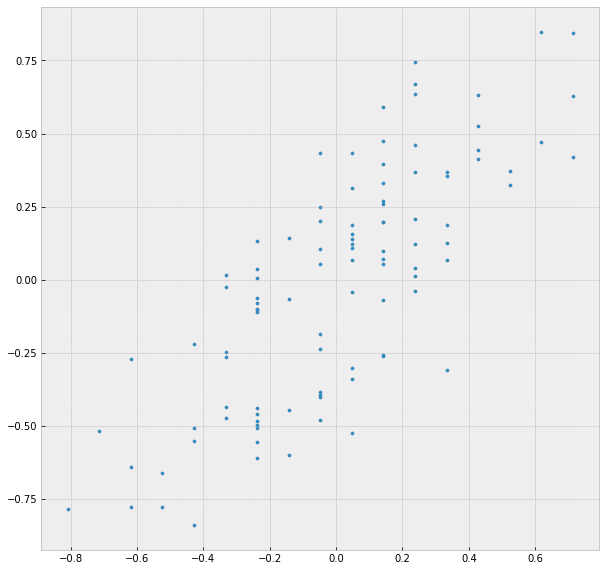

In [93]:
plt.figure(figsize=(10,10))
plt.scatter(kts, y.data.tolist(), s=10)

In [52]:
y.sort()

(Variable containing:
 -0.8032
 -0.7872
 -0.7064
 -0.6720
 -0.6575
 -0.5962
 -0.5717
 -0.5681
 -0.5651
 -0.5241
 -0.5233
 -0.4937
 -0.4858
 -0.4671
 -0.4669
 -0.4235
 -0.4233
 -0.4129
 -0.4080
 -0.4041
 -0.4035
 -0.3939
 -0.3864
 -0.3730
 -0.2859
 -0.2841
 -0.2675
 -0.2655
 -0.2640
 -0.2570
 -0.2512
 -0.2350
 -0.2193
 -0.2080
 -0.2050
 -0.1918
 -0.1870
 -0.1780
 -0.1671
 -0.1661
 -0.1550
 -0.1524
 -0.1397
 -0.1316
 -0.1280
 -0.1002
 -0.0971
 -0.0775
 -0.0744
 -0.0703
 -0.0699
 -0.0688
 -0.0680
 -0.0539
 -0.0518
 -0.0446
 -0.0370
 -0.0162
 -0.0100
  0.0037
  0.0050
  0.0224
  0.0378
  0.0657
  0.0817
  0.0921
  0.1101
  0.1111
  0.1429
  0.1615
  0.1749
  0.2098
  0.2366
  0.2415
  0.2425
  0.2506
  0.2510
  0.2919
  0.3033
  0.3039
  0.3713
  0.3835
  0.3845
  0.4199
  0.4362
  0.4787
  0.4842
  0.4919
  0.5055
  0.5158
  0.5174
  0.5652
  0.6404
  0.6762
  0.7338
  0.7892
  0.8095
  0.8880
  0.9009
  0.9689
 [torch.FloatTensor of size 100], Variable containing:
  72
  78
  86
  28
  7